# An approach to scrape job postings and find most common job requirements keywords

### Importing some of the libraries

In [165]:
# Importing all necessary libraries.
from bs4 import BeautifulSoup  # For parsing html texts, a must have.
import requests  # To handle url requests
import pandas as pd  # May or may not need.
# import numpy as np  # May or may not need.
print("Libraries imported.")

Libraries imported.


### This needs to be more robust so we can add multiple sources. This is just to try if it can handle one single source.

In [166]:
pd.set_option('max_colwidth', 800)  # So it doesn't exceed window width.# Making forst batch of soup.

# Making first batch of soup.
source = requests.get('https://www.amazon.jobs/en/jobs/838676/quality-assurance-manager')
soup = BeautifulSoup(source.text, 'html.parser')
print(soup.select("html head title")[0].get_text())

Quality Assurance Manager - Job ID: 838676 | Amazon.jobs


### Scrapping only paragraphs within a body tag.

In [167]:
# Search for paragraphs only.
text = [p.text for p in soup.find_all('p')]
with open('raw2.txt', mode='w') as file:
    for listitem in text:
        file.write(listitem)

### Simplifying task by importing NLTK which will convert our paragraphs into tekoenized words.

In [168]:
# NLTK time
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
try:
    nltk.download('popular');
    print("Popular NLTK resources downloaded successfully")
except:
    print("NLTK could not download necessary resources")

Popular NLTK resources downloaded successfully


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\hi_de\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\hi_de\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\hi_de\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\hi_de\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\hi_de\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

### Writing raw texts into a text file which can be treated as a saving point.

In [169]:
with open('raw2.txt', mode='r') as source_words:
    wtoken_one = word_tokenize(source_words.read())
print(len(wtoken_one))

490


### First filter to get rid of punctuations and symbols. Adding these to stop_words is another possiblity.

In [171]:
# getting rid of punctuations and symbols.
file = open('raw2.txt' , "r")
filter_one = [word.replace(",", "").replace(".", "").replace("·", "").replace(":", "").replace("|", "")
              for line in file for word in line.lower().split()]
len(filter_one)

460

### Creating custom stop_words on top of the default ones.

In [184]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("English"))
print("Default stop words count: ", len(stop_words))
# Append junks to the stop_words set
stop_words.update(",", ":", "|", ".", "?", "/", "-", "_")
print("After adding additional stop words count: ", len(stop_words))

Default stop words count:  179
After adding additional stop words count:  187


### This has to be more robust. Slicing the first filter to fit with only job requirements paragraphs.

In [186]:
# filter_one.index("performs") > 273
# filter_one.index("optimal") > 435
# Need to modify the first list. Lot of junks came in. Search for keyword where you want to slice.
filter_two = filter_one[filter_one.index("performs"):filter_one.index("optimal")]
len(filter_two)

162

### Third filter. Stop words applied. This can be filtered further.

In [187]:
# This is to apply the stop words created earlier. 
filter_three = [w for w in filter_two if not w in stop_words]
len(filter_three)

116

### Importing wordcloud and matplotlib for visualization.

In [188]:
from os import path
# from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

###  Converting the unorganized list from filter_three into a dictionary which can later be converted into a pandas dataframe.

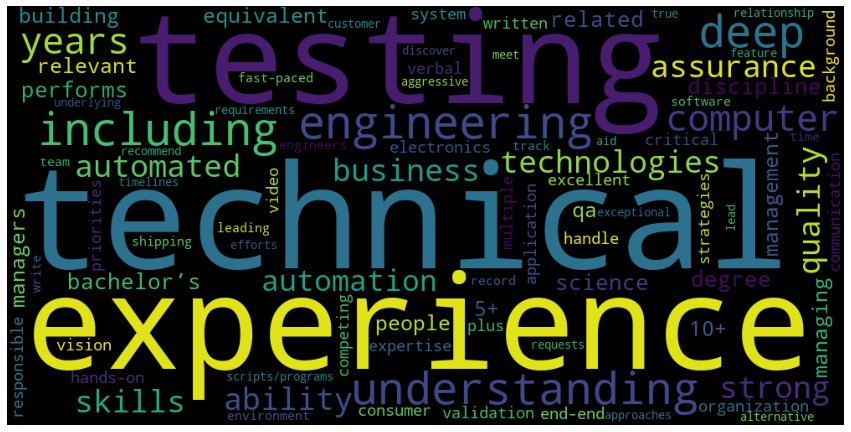

In [199]:
# Convert the list into a dictionary with values and its occurences
from collections import Counter
word_could_dict=Counter(filter_three)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('word_cloud_img1.png', bbox_inches='tight')
plt.close()

### First dataframe with two columns Words and Counts. 

In [223]:
# Let's get into Pandas
df = pd.DataFrame(list(word_could_dict.items()), columns=['Words', 'Counts'])

### An overview of the dataframe based on counts. Two more dataframes were created at this point.

In [239]:
most_common = df.sort_values('Counts', ascending=False)
top = most_common.head(10)
top

,Words,Counts
30,testing,4
13,experience,4
7,technical,4
29,understanding,3
17,including,3
34,deep,3
5,engineering,3
38,assurance,2
33,automated,2
11,years,2


### A simple bar chart showing frequency of words.

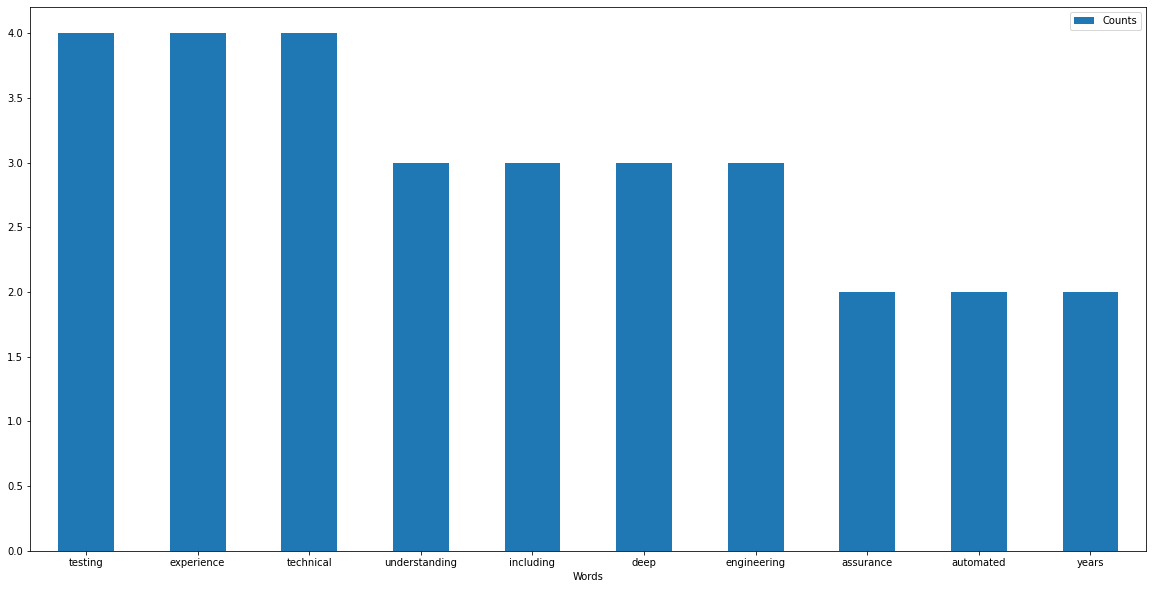

In [241]:
ax = top.plot.bar(x='Words', y='Counts', rot=0, figsize=(20,10))
# type(df.index)

# most_common['Words'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

### This is end of version 1.0. This project is still in progress.